# Assignment 2
**Fri April 25, 2025 at 11:00 AM**

## **Professional Influencer**

Note: ผลลัพธ์สุดท้ายจะได้ทั้งหมด 334 ระเบียน (ไม่รวม Header)

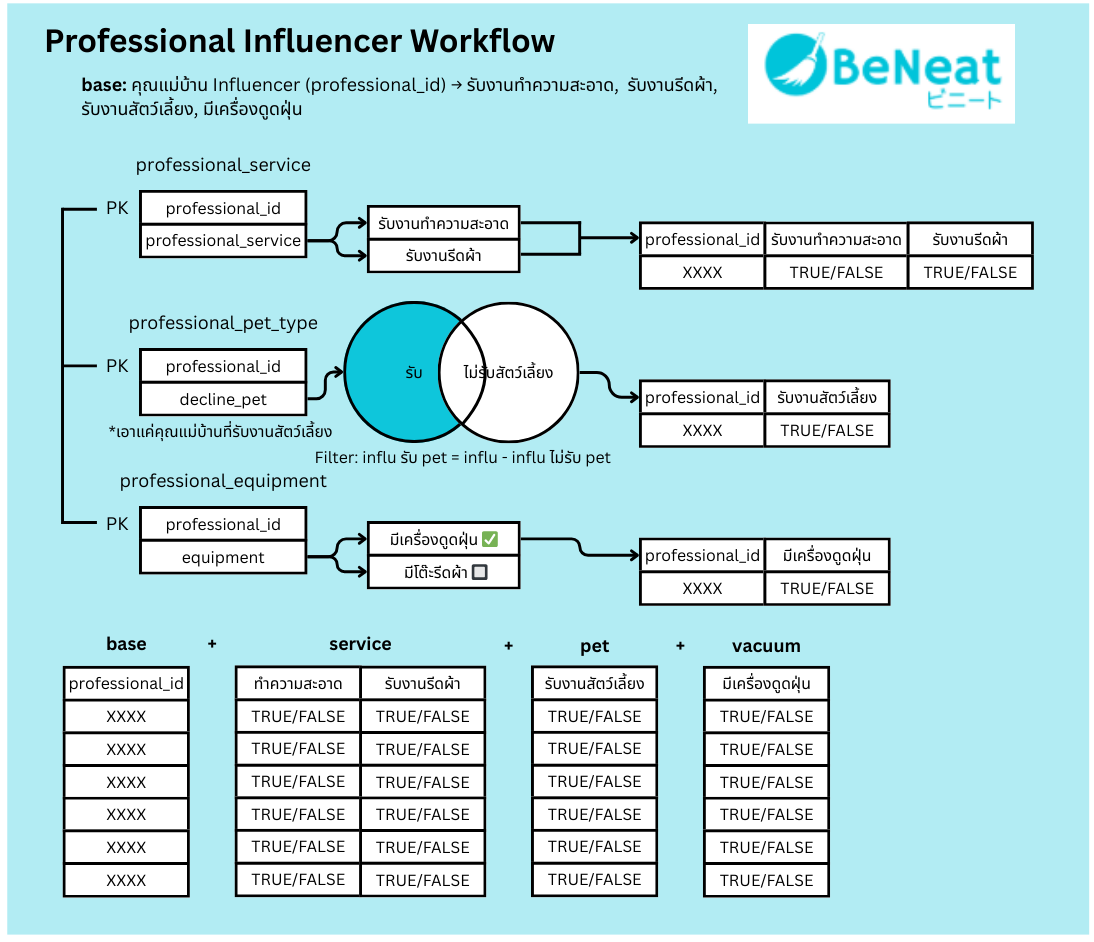

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read and Understanding the Data
import pandas as pd

service = pd.read_csv("/content/drive/MyDrive/Cooperative Education/Professional Influencer/professional_service_raw.csv")
pet = pd.read_csv("/content/drive/MyDrive/Cooperative Education/Professional Influencer/professional_pet_type_raw.csv")
equipment = pd.read_csv("/content/drive/MyDrive/Cooperative Education/Professional Influencer/professional_equipment.csv")
base = pd.read_csv("/content/drive/MyDrive/Cooperative Education/Professional Influencer/base-professional-id.csv")


### Service

In [ ]:
# Display service data frame
service

,Unnamed: 0,professional_id,professional_service_type
0,0,0,รับงานทำความสะอาด
1,1,1,รับงานทำความสะอาด
2,2,1,รับงานรีดผ้า
3,3,2,รับงานทำความสะอาด
4,4,2,รับงานรีดผ้า
...,...,...,...
13234,13234,12687,รับงานทำความสะอาด
13235,13235,12688,รับงานทำความสะอาด
13236,13236,12689,รับงานทำความสะอาด
13237,13237,12690,รับงานทำความสะอาด


#### Data Cleaning

In [ ]:
# Check if service have missing data
service.isnull().sum()

,0
Unnamed: 0,0
professional_id,0
professional_service_type,0


In [ ]:
# Drop unneccessary column
service = service.drop('Unnamed: 0', axis=1)

In [ ]:
# Check if data element is consistent
service["professional_service_type"].unique()

array(['รับงานทำความสะอาด', 'รับงานรีดผ้า'], dtype=object)

#### Service Influencer Mapping

In [ ]:
# Add column ["รับงานทำความสะอาด"], ["รับงานรีดผ้า"]

# If professional_id is รับงานทำความสะอาด then True to service["รับงานทำความสะอาด"]
# Else False to service[""]

def assign_service_influencer(df):
    if df["professional_service_type"] == "รับงานทำความสะอาด":
       df["รับงานทำความสะอาด"] = "TRUE"
       df["รับงานรีดผ้า"] = "FALSE"
    else:
       df["รับงานทำความสะอาด"] = "FALSE"
       df["รับงานรีดผ้า"] = "TRUE"
    return df

# Apply the function to all rows
service = service.apply(assign_service_influencer, axis=1)


In [ ]:
service

,professional_id,professional_service_type,รับงานทำความสะอาด,รับงานรีดผ้า
0,0,รับงานทำความสะอาด,TRUE,FALSE
1,1,รับงานทำความสะอาด,TRUE,FALSE
2,1,รับงานรีดผ้า,FALSE,TRUE
3,2,รับงานทำความสะอาด,TRUE,FALSE
4,2,รับงานรีดผ้า,FALSE,TRUE
...,...,...,...,...
13234,12687,รับงานทำความสะอาด,TRUE,FALSE
13235,12688,รับงานทำความสะอาด,TRUE,FALSE
13236,12689,รับงานทำความสะอาด,TRUE,FALSE
13237,12690,รับงานทำความสะอาด,TRUE,FALSE


In [ ]:
# Drop professional_service_type
service = service.drop("professional_service_type", axis=1)
service.head()

,professional_id,รับงานทำความสะอาด,รับงานรีดผ้า
0,0,TRUE,FALSE
1,1,TRUE,FALSE
2,1,FALSE,TRUE
3,2,TRUE,FALSE
4,2,FALSE,TRUE


In [ ]:
# Check for duplicate professional_ids
duplicate_professional_ids = service[service.duplicated(subset=['professional_id'], keep=False)]

if not duplicate_professional_ids.empty:
    print("Duplicate professional_ids found:")
    print(duplicate_professional_ids)
else:
    print("No duplicate professional_ids found.")


Duplicate professional_ids found:
       professional_id รับงานทำความสะอาด รับงานรีดผ้า
1                    1              TRUE        FALSE
2                    1             FALSE         TRUE
3                    2              TRUE        FALSE
4                    2             FALSE         TRUE
5                    4              TRUE        FALSE
...                ...               ...          ...
12978            12421             FALSE         TRUE
12983            12426              TRUE        FALSE
12984            12426             FALSE         TRUE
13030            12477              TRUE        FALSE
13031            12477             FALSE         TRUE

[1887 rows x 3 columns]


In [ ]:
# Merge data rows with the same professional_id
service = service.groupby("professional_id").agg(
    {"รับงานทำความสะอาด": lambda x: "TRUE" if "TRUE" in x.values else "FALSE",
     "รับงานรีดผ้า": lambda x: "TRUE" if "TRUE" in x.values else "FALSE"}
    ).reset_index()

service.head()


,professional_id,รับงานทำความสะอาด,รับงานรีดผ้า
0,0,TRUE,FALSE
1,1,TRUE,TRUE
2,2,TRUE,TRUE
3,4,TRUE,TRUE
4,5,TRUE,TRUE


In [ ]:
# Check for duplicate professional_ids
duplicate_professional_ids = service[service.duplicated(subset=['professional_id'], keep=False)]

if not duplicate_professional_ids.empty:
    print("Duplicate professional_ids found:")
    print(duplicate_professional_ids)
else:
    print("No duplicate professional_ids found.")

No duplicate professional_ids found.


### Pet

ใน Data นี้มีแต่คุณแม่บ้านที่ไม่รับงานสัตว์เลี้ยง

ดังนั้น ต้องไม่ลืมที่จะ Filter service และ equipment ให้มี id แบบเดียวกันกับ id ใน pet

In [ ]:
pet

,Unnamed: 0,professional_id,decline_pet
0,0,4236,สัตว์เลื้อยคลาน
1,1,1978,สุนัข
2,2,1978,แมว
3,3,1978,สัตว์เลื้อยคลาน
4,4,1978,สัตว์มีขน
...,...,...,...
6707,6707,12599,สัตว์เลื้อยคลาน
6708,6708,3759,แมว
6709,6709,3759,สัตว์เลื้อยคลาน
6710,6710,3759,สัตว์มีขน


#### Data Cleaning

In [ ]:
pet.isnull().sum()

,0
Unnamed: 0,0
professional_id,0
decline_pet,0


In [ ]:
pet = pet.drop('Unnamed: 0', axis=1)

In [ ]:
# Check if data element is consistent
pet["decline_pet"].unique()

array(['สัตว์เลื้อยคลาน', 'สุนัข', 'แมว', 'สัตว์มีขน', 'อื่น ๆ'],
      dtype=object)

In [ ]:
pet["decline_pet"].value_counts()

,count
decline_pet,
สัตว์เลื้อยคลาน,3382
สุนัข,1177
สัตว์มีขน,1073
แมว,898
อื่น ๆ,182


#### Pet Influencer Mapping
อื่น ๆ = น่าจะหมายถึง ปลา หนู กระต่าย หรือสัตว์เลี้ยงที่ไม่ได้อยู่ใน List

ดังนั้น ทุกแถวของ pet จัดว่า รับงานสัตว์เลี้ยง เป็น TRUE ทั้งหมด

In [ ]:

def assign_pet_influencer(df):
    if df["decline_pet"] == "สัตว์เลื้อยคลาน":
        df["รับงานสัตว์เลี้ยง"] = "TRUE"
    elif df["decline_pet"] == "สุนัข":
        df["รับงานสัตว์เลี้ยง"] = "TRUE"
    elif df["decline_pet"] == "สัตว์มีขน":
        df["รับงานสัตว์เลี้ยง"] = "TRUE"
    elif df["decline_pet"] == "แมว":
        df["รับงานสัตว์เลี้ยง"] = "TRUE"
    else:
        df["รับงานสัตว์เลี้ยง"] = "TRUE"

    return df

pet = pet.apply(assign_pet_influencer, axis=1)


In [ ]:
pet

,professional_id,decline_pet,รับงานสัตว์เลี้ยง
0,4236,สัตว์เลื้อยคลาน,TRUE
1,1978,สุนัข,TRUE
2,1978,แมว,TRUE
3,1978,สัตว์เลื้อยคลาน,TRUE
4,1978,สัตว์มีขน,TRUE
...,...,...,...
6707,12599,สัตว์เลื้อยคลาน,TRUE
6708,3759,แมว,TRUE
6709,3759,สัตว์เลื้อยคลาน,TRUE
6710,3759,สัตว์มีขน,TRUE


In [ ]:
pet["รับงานสัตว์เลี้ยง"].value_counts()

,count
รับงานสัตว์เลี้ยง,
TRUE,6712


In [ ]:
# Check for duplicate professional_ids
duplicate_professional_ids = pet[pet.duplicated(subset=['professional_id'], keep=False)]

if not duplicate_professional_ids.empty:
    print("Duplicate professional_ids found:")
    print(duplicate_professional_ids)
else:
    print("No duplicate professional_ids found.")


Duplicate professional_ids found:
      professional_id      decline_pet รับงานสัตว์เลี้ยง
1                1978            สุนัข              TRUE
2                1978              แมว              TRUE
3                1978  สัตว์เลื้อยคลาน              TRUE
4                1978        สัตว์มีขน              TRUE
5                1978           อื่น ๆ              TRUE
...               ...              ...               ...
6699            12563            สุนัข              TRUE
6700            12563  สัตว์เลื้อยคลาน              TRUE
6708             3759              แมว              TRUE
6709             3759  สัตว์เลื้อยคลาน              TRUE
6710             3759        สัตว์มีขน              TRUE

[4513 rows x 3 columns]


In [ ]:

# Merge data rows with the same professional_id
pet = pet.groupby("professional_id").agg(
    {"รับงานสัตว์เลี้ยง": lambda x: "TRUE" if "TRUE" in x.values else "FALSE"}
    ).reset_index()

pet.head()


,professional_id,รับงานสัตว์เลี้ยง
0,1,TRUE
1,2,TRUE
2,3,TRUE
3,4,TRUE
4,41,TRUE


In [ ]:
# Check for duplicate professional_ids
duplicate_professional_ids = pet[pet.duplicated(subset=['professional_id'], keep=False)]

if not duplicate_professional_ids.empty:
    print("Duplicate professional_ids found:")
    print(duplicate_professional_ids)
else:
    print("No duplicate professional_ids found.")


No duplicate professional_ids found.


### Equipment

In [ ]:
equipment

,Unnamed: 0,professional_id,equipment
0,0,19,เครื่องดูดฝุ่น
1,1,66,เครื่องดูดฝุ่น
2,2,105,เครื่องดูดฝุ่น
3,3,115,เครื่องดูดฝุ่น
4,4,61,เครื่องดูดฝุ่น
...,...,...,...
7923,7923,12684,เครื่องดูดฝุ่น
7924,7924,12681,เครื่องดูดฝุ่น
7925,7925,12680,เครื่องดูดฝุ่น
7926,7926,12683,เครื่องดูดฝุ่น


#### Data Cleaning

In [ ]:
# Check for missing data
equipment.isnull().sum()

,0
Unnamed: 0,0
professional_id,0
equipment,0


In [ ]:
equipment = equipment.drop('Unnamed: 0', axis=1)

In [ ]:
# Check for data consistency
equipment["equipment"].unique()

array(['เครื่องดูดฝุ่น', 'โต๊ะรีดผ้า'], dtype=object)

#### Equipment Influencer Mapping

We only need คุณแม่บ้าน with เครื่องดูดฝุ่น -> TRUE

In [ ]:
equipment["equipment"].value_counts()

,count
equipment,
เครื่องดูดฝุ่น,7667
โต๊ะรีดผ้า,261


In [ ]:
# Function for new column is_vacuum
def assign_equipment_influencer(df):
    if df["equipment"] == "เครื่องดูดฝุ่น":
       df["is_vacuum"] = "TRUE"
    else:
       df["is_vacuum"] = "FALSE"
    return df

equipment = equipment.apply(assign_equipment_influencer, axis=1)


In [ ]:
equipment

,professional_id,equipment,is_vacuum
0,19,เครื่องดูดฝุ่น,TRUE
1,66,เครื่องดูดฝุ่น,TRUE
2,105,เครื่องดูดฝุ่น,TRUE
3,115,เครื่องดูดฝุ่น,TRUE
4,61,เครื่องดูดฝุ่น,TRUE
...,...,...,...
7923,12684,เครื่องดูดฝุ่น,TRUE
7924,12681,เครื่องดูดฝุ่น,TRUE
7925,12680,เครื่องดูดฝุ่น,TRUE
7926,12683,เครื่องดูดฝุ่น,TRUE


In [ ]:
# Check for duplicate professional_ids
duplicate_professional_ids = equipment[equipment.duplicated(subset=['professional_id'], keep=False)]

if not duplicate_professional_ids.empty:
    print("Duplicate professional_ids found:")
    print(duplicate_professional_ids)
else:
    print("No duplicate professional_ids found.")


Duplicate professional_ids found:
      professional_id       equipment is_vacuum
63                207  เครื่องดูดฝุ่น      TRUE
68                212  เครื่องดูดฝุ่น      TRUE
90                207  เครื่องดูดฝุ่น      TRUE
91                207  เครื่องดูดฝุ่น      TRUE
92                207  เครื่องดูดฝุ่น      TRUE
...               ...             ...       ...
7728             8907      โต๊ะรีดผ้า     FALSE
7834            12108      โต๊ะรีดผ้า     FALSE
7888            12108  เครื่องดูดฝุ่น      TRUE
7908             1946  เครื่องดูดฝุ่น      TRUE
7909               41  เครื่องดูดฝุ่น      TRUE

[383 rows x 3 columns]


In [ ]:
# Merge data rows with the same professional_id, considering 'is_vacuum'
equipment = equipment.groupby("professional_id").agg(
    {"is_vacuum": lambda x: "TRUE" if "TRUE" in x.values else "FALSE"}
    ).reset_index()

equipment.head()


,professional_id,is_vacuum
0,1,TRUE
1,3,TRUE
2,4,TRUE
3,5,TRUE
4,10,TRUE


In [ ]:
# Check for duplicate professional_ids
duplicate_professional_ids = equipment[equipment.duplicated(subset=['professional_id'], keep=False)]

if not duplicate_professional_ids.empty:
    print("Duplicate professional_ids found:")
    print(duplicate_professional_ids)
else:
    print("No duplicate professional_ids found.")

No duplicate professional_ids found.


### Base

In [ ]:
base

,????,?????????????????,????????????,?????????????????.1,????????????????
0,9360,False,False,False,False
1,9702,False,False,False,False
2,10954,False,False,False,False
3,12523,False,False,False,False
4,8566,False,False,False,False
...,...,...,...,...,...
329,12066,False,False,False,False
330,12337,False,False,False,False
331,12339,False,False,False,False
332,12481,False,False,False,False


#### Prepare Data

In [ ]:

# Rename columns in the 'service' DataFrame
service = service.rename(columns={
    "รับงานทำความสะอาด": "cleaning_service",
    "รับงานรีดผ้า": "ironing_service"
})

# Rename columns in the 'pet' DataFrame
pet = pet.rename(columns={
    "รับงานสัตว์เลี้ยง": "pet_service"
})

# Rename columns in the 'equipment' DataFrame
equipment = equipment.rename(columns={
    "is_vacuum": "has_vacuum"
})


In [ ]:
# Rename columns in the 'base' DataFrame
base.columns = ["professional_id",
                "cleaning_service",
                "ironing_service",
                "pet_service",
                "has_vacuum"]
base

,professional_id,cleaning_service,ironing_service,pet_service,has_vacuum
0,9360,False,False,False,False
1,9702,False,False,False,False
2,10954,False,False,False,False
3,12523,False,False,False,False
4,8566,False,False,False,False
...,...,...,...,...,...
329,12066,False,False,False,False
330,12337,False,False,False,False
331,12339,False,False,False,False
332,12481,False,False,False,False


In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   professional_id   334 non-null    int64
 1   cleaning_service  334 non-null    bool 
 2   ironing_service   334 non-null    bool 
 3   pet_service       334 non-null    bool 
 4   has_vacuum        334 non-null    bool 
dtypes: bool(4), int64(1)
memory usage: 4.0 KB


In [ ]:
# Replace "TRUE" and "FALSE" with boolean values in the specified columns
def replace_boolean_strings(df, column_names):
    for col in column_names:
        df[col] = df[col].replace({"TRUE": True, "FALSE": False})
    return df

service = replace_boolean_strings(service, ["cleaning_service", "ironing_service"])
pet = replace_boolean_strings(pet, ["pet_service"])
equipment = replace_boolean_strings(equipment, ["has_vacuum"])


<ipython-input-234-4dd024015457>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({"TRUE": True, "FALSE": False})


#### Merge: Base + Service + Pet + Equipment

**Version 1.0**

In [ ]:
'''
# Professional Influencer Function
def professional_influencer(base, service, pet, equipment):
    # Base + Service
    if base["professional_id"] == service["professional_id"]:
       base["cleaning_service"] = service["cleaning_service"]
       base["ironing_service"] = service["ironing_service"]
    # Base + Pet
    if base["professional_id"] == pet["professional_id"]:
       base["pet_service"] = pet["pet_service"]
    # Base + Equipment
    if base["professional_id"] == equipment["professional_id"]:
       base["has_vacuum"] = equipment["has_vacuum"]
    return base

base = base.apply(professional_influencer, axis=1)
'''

'\n# Professional Influencer Function\ndef professional_influencer(base, service, pet, equipment):\n    # Base + Service \n    if base["professional_id"] == service["professional_id"]:\n       base["cleaning_service"] = service["cleaning_service"]\n       base["ironing_service"] = service["ironing_service"]\n    # Base + Pet\n    if base["professional_id"] == pet["professional_id"]:\n       base["pet_service"] = pet["pet_service"]\n    # Base + Equipment\n    if base["professional_id"] == equipment["professional_id"]:\n       base["has_vacuum"] = equipment["has_vacuum"]\n    return base\n  \nbase = base.apply(professional_influencer, axis=1)\n'

**Version 2.0**

In [ ]:
def professional_influencer(base, service, pet, equipment):
    # Merge with service DataFrame
    base = base.merge(service, on='professional_id', how='left')
    # Rename columns to avoid conflicts
    base = base.rename(columns={'cleaning_service_y': 'cleaning_service', 'ironing_service_y': 'ironing_service'})
    # Merge with pet DataFrame
    base = base.merge(pet, on='professional_id', how='left')
    # Rename column to avoid conflict
    base = base.rename(columns={'pet_service_y': 'pet_service'})
    # Merge with equipment DataFrame
    base = base.merge(equipment, on='professional_id', how='left')
    # Rename column to avoid conflict
    base = base.rename(columns={'has_vacuum_y': 'has_vacuum'})
    # Keep only the desired columns
    base = base[['professional_id', 'cleaning_service', 'ironing_service', 'pet_service', 'has_vacuum']]
    return base

# Assuming 'base', 'service', 'pet', and 'equipment' are your DataFrames
base = professional_influencer(base, service, pet, equipment)


In [ ]:
base

,professional_id,cleaning_service,ironing_service,pet_service,has_vacuum
0,9360,True,False,True,True
1,9702,True,False,True,True
2,10954,True,False,True,True
3,12523,True,False,True,True
4,8566,True,False,True,True
...,...,...,...,...,...
329,12066,True,False,True,NaN
330,12337,NaN,NaN,True,NaN
331,12339,NaN,NaN,NaN,NaN
332,12481,True,False,True,True


#### Data Auditing

In [ ]:
# prompt: Count NaN value in each columns

# Count NaN values in each column of the 'base' DataFrame
nan_counts = base.isnull().sum()
nan_counts


,0
professional_id,0
cleaning_service,19
ironing_service,19
pet_service,113
has_vacuum,27


เรื่อง NaN นี่ก็สำคัญ บางที NaN มันมีความหมายนะ เช่น พวกการเงินเราอาจจะแทนข้อมูลเป็น 0 ไปก่อน

ดังนั้น เราก็ควรมีการทำ Quality Auditing บน Data ให้ดี ๆ ก่อน

In [ ]:
# Fill NaN values with False in the 'base' DataFrame
base = base.fillna(False)

base


<ipython-input-240-7885c131e41c>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  base = base.fillna(False)


,professional_id,cleaning_service,ironing_service,pet_service,has_vacuum
0,9360,True,False,True,True
1,9702,True,False,True,True
2,10954,True,False,True,True
3,12523,True,False,True,True
4,8566,True,False,True,True
...,...,...,...,...,...
329,12066,True,False,True,False
330,12337,False,False,True,False
331,12339,False,False,False,False
332,12481,True,False,True,True


## Export Final Result to Google Sheets

https://docs.google.com/spreadsheets/d/1iBlZbsv2Ye7eAmS_JUogmE2B2F1pdEGLm9wuaZWiPrI/edit?usp=sharing

In [ ]:
base.to_csv('base.csv', index=False)


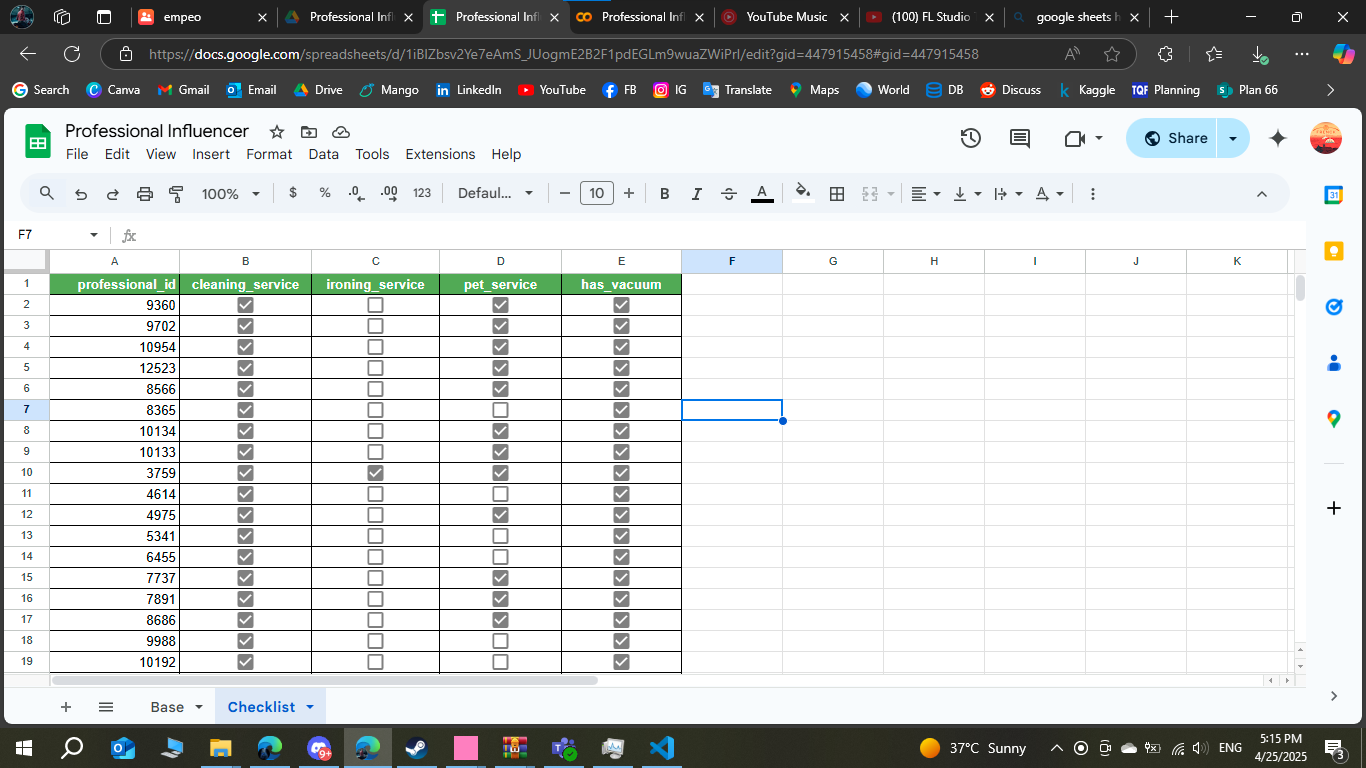